# Dataset: Boston housing

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-valjue property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

df = pd.read_csv(url)

df.head()

In [ ]:
df.info()

In [ ]:
# lets find a feature that correlates strongly
df.corr()['medv']


## Terminology

#### Data
Feature or input variable or independent variable
Target or dependent variable or prediction

#### Modelling
model - a function or a system or sequence of logic that takes input and produces an output

loss function - a defined function that represents the error of your model compared with real results



### Simple case: Linear regression with one input


y = b + w X

X -> input variable lets take the room number only

y -> value of the dwelling

The goal is to find w and b that reduces the loss function below:

loss = Sum( ( y - yPred ) ^ 2)

In [ ]:
# Let's focus only on a single feature as opposed to all features
X = df[['rm']]

In [ ]:
# We are trying to predict the price, so we will use 'medv'
y = df['medv']

### Train Test split

We keep a portion of the data for evaluation of the model. typically between 15 to 25 percent of the data
This is to ensure the model is able to make good prediction for unseen data as a complex model can be capable of memorizing the training data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

### Plotting data

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, label='Training set')
plt.scatter(X_test, y_test, label='Test set')

plt.xlabel('Feature (average number of rooms)')
plt.ylabel('Target (median value)')

plt.title('Real Estate Price based on number of rooms')
plt.legend();

### Training
Is based on the train set only and is simply a single line (in general is a hyperplane)

There is so much action happening under the 'fit' method here!

In [ ]:
# Doc at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train);

In [ ]:
# Model coefficients (parameters)
b = reg.intercept_
w = reg.coef_

print(f'b={b} and w={w}')

### Evaluating
We will evaluate the performance of the model for both training and test datasets

The score of a linear regression is the coefficient of determination which is 1 - loss / (variance of true targets * size)

In [ ]:
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print(f'Train score is: {train_score}')
print(f'Test score is: {test_score}')

In [ ]:
# Prediction -> the model can be used for the application
num_rooms = 6.
price = reg.predict([[num_rooms]])

print(price)

In [ ]:
# Let's plot the fitted line
y_pred = reg.predict(X)

plt.scatter(X['rm'], y, label='All data')
plt.scatter(X['rm'], y_pred, color='red', label='Fitted line')


plt.xlabel('Feature (average number of rooms)')
plt.ylabel('Target (median value)')

plt.title('Real Estate Price based on number of rooms')
plt.legend();

### Reflection
Why did we get such scores?

Could it be that our model is too simple?
No based on the scatter plot it seems like a more complex can't do better necessarily

Could it be an isssue with the data? Yes, it seems like that simply relying on the number of rooms is not a good criteria for predicting the price. Let's include more features and see if we can get a better score

In [324]:
# Preparing data
X = df.drop(columns=['medv'])
y = df['medv']

In [325]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [339]:
# Scaling: we need to bring all the features in the same scale
from sklearn.preprocessing import StandardScaler

# Using a scaler object to bring all features in the same range (only using the training set to avoid data leak)
scaler = StandardScaler().fit(X_train)

# Generating a scaled train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [379]:
# View the scaled values in a DataFrame format
pd.DataFrame(X_train_scaled, columns=[c + '_scaled' for c in X_train.columns])

,crim_scaled,zn_scaled,indus_scaled,chas_scaled,nox_scaled,rm_scaled,age_scaled,dis_scaled,rad_scaled,tax_scaled,ptratio_scaled,b_scaled,lstat_scaled
0,4.525814,-0.491700,1.063293,-0.267615,1.247460,-1.191832,1.129465,-1.138879,1.688013,1.552020,0.814650,0.435324,2.697084
1,-0.242101,-0.491700,1.282550,-0.267615,2.817626,0.316718,1.129465,-1.003606,-0.505518,-0.023713,-1.714555,0.067420,-0.716090
2,-0.413988,0.046055,-0.452242,-0.267615,-0.243315,-0.569573,-1.002959,0.800522,-0.505518,-0.574920,-1.484628,0.363075,0.507945
3,-0.399310,-0.491700,2.491422,-0.267615,0.506483,-1.705624,1.059549,-0.975846,-0.620967,1.821632,0.768664,-0.450513,2.563205
4,-0.215810,-0.491700,1.624767,-0.267615,0.638800,-1.811236,1.129465,-1.163456,-0.620967,0.179994,1.274506,0.435324,3.259080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.418186,1.229116,-0.668535,3.736705,-0.922545,0.767713,-1.401478,0.512596,-0.620967,-0.916429,-0.380974,0.396377,-1.191286
400,-0.419023,0.927974,-1.295193,-0.267615,-0.702016,0.468001,-0.335266,-0.218259,-0.274620,-1.108153,-0.013090,0.395361,-0.489526
401,-0.421516,2.949933,-1.078900,-0.267615,-1.407708,-0.588126,-1.698619,2.645972,-0.967314,-0.550955,-0.932801,0.415907,-0.442447
402,-0.404457,-0.491700,-0.524833,-0.267615,-0.516771,0.196833,-0.538021,0.354753,-0.505518,-0.718714,0.538737,0.435324,-0.744043


In [380]:
# Training
reg_full = linear_model.LinearRegression()

reg_full.fit(X_train_scaled, y_train);

In [381]:
train_score = reg_full.score(X_train_scaled, y_train)
test_score = reg_full.score(X_test_scaled, y_test)

print(f'Train score is: {train_score}')
print(f'Test score is: {test_score}')

Train score is: 0.7323419940116792
Test score is: 0.7612436444752164


In [382]:
# For prediction you have to provide all the features now.
# Lets calulatethe prediction for all test data by adding a column and comparing
y_test_predictions= reg_full.predict(X_test_scaled)

y_test_predictions_series = pd.Series(y_test_predictions, name='medv_pred')

In [383]:
pd.concat([y_test.reset_index(drop=True), y_test_predictions_series], axis = 1)

,medv,medv_pred
0,25.0,22.606778
1,23.2,16.780214
2,20.5,20.171050
3,31.6,33.486764
4,17.6,16.736640
...,...,...
97,25.0,28.536715
98,33.0,23.244075
99,43.8,34.593981
100,16.2,14.851894


# Bias-Variance trade off

A key concept in ML to understand is bias-variance trade-off. 

- A model with high bias makes strong assumptions such as a linear relationship
- A model with high variance makes minimal assumptions and conforms to variations in data

high bias and high variance both can hurt predictions. There is always a trade-off meaning you cannot have a model with low bias and low variance. Finding the right balance is key

### kNN
K Nearest Neighbors is a low bias model. It simply memorizes the whole training set. It will then look at the k closest data points in the training set and makes a prediction based on those. 

In [384]:
# Splitting
X = df[['rm']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

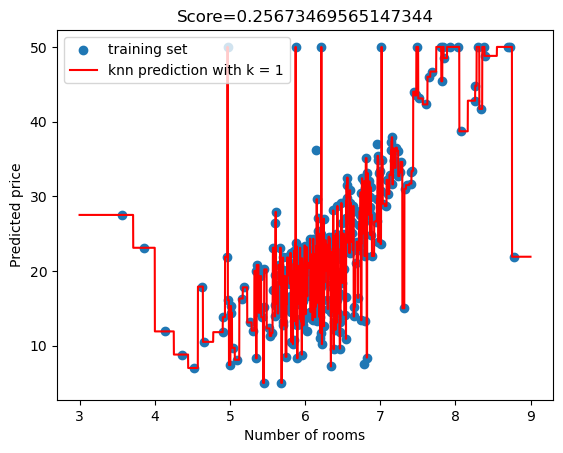

In [385]:
from sklearn.neighbors import KNeighborsRegressor

# the Hyper parameter k acts as a 'regularization'. The higher k the lower the variance
k = 1

knnRegressor = KNeighborsRegressor(n_neighbors=k)
knnRegressor.fit(X_train, y_train);


# Let's calculate the score
score = knnRegressor.score(X_test, y_test)

import numpy as np
sample = pd.DataFrame([[rm] for rm in np.arange(3,9, 0.001)], columns=['rm'])

plt.scatter(X_train, y_train, label='training set')
plt.plot(sample, knnRegressor.predict(sample), color='red', label=f'knn prediction with k = {k}')

plt.xlabel('Number of rooms')
plt.ylabel('Predicted price')
plt.title(f'Score={score}')
plt.legend();

### Simple Hyperparameter tuning

Involves looking for the best hyperparameter configuration for maximizing a score.

In our kNN case, we want to find the best K for maximum score

In [401]:
def getScores(k):
    knnRegressor = KNeighborsRegressor(n_neighbors=k)
    knnRegressor.fit(X_train, y_train)
    
    trainScore = knnRegressor.score(X_train, y_train)
    testScore = knnRegressor.score(X_test, y_test)
    
    return trainScore, testScore

In [402]:
ks = range(1,100)
scores = [getScores(k) for k in ks]

train_scores = [score[0] for score in scores]
test_scores = [score[1] for score in scores]

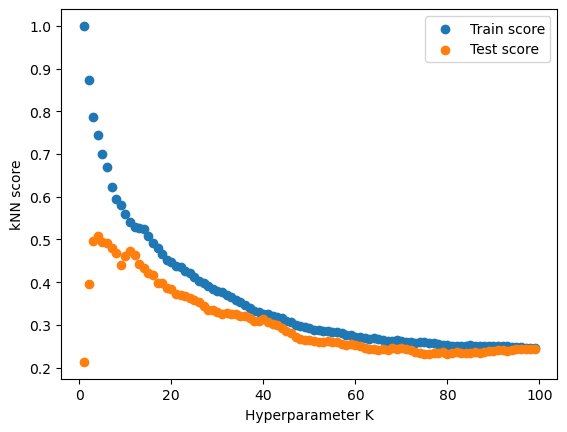

In [403]:
plt.scatter(ks, train_scores, label='Train score')
plt.scatter(ks, test_scores, label='Test score')
plt.xlabel('Hyperparameter K')
plt.ylabel('kNN score')
plt.legend();

### Knn with all features

In [393]:
# Preparing data
X = df.drop(columns=['medv'])
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Scaling here is particularly important due to the notion of 'distance' between neighbors
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rerun cells above make sure to user the scaled version of the features

### Cross validation

An important technique to ensure your analysis is not sensitive to your data split. In the example above let's change the random_state to produce different splits. You will see that the scores chart will change drammatically.

![Cross Validation](https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/featured.png)

## Polynomial Regression
As opposed to linear regression that assumes target is a linear combination of feature values, polynomial regression assumes a more comples shape. For example a polynomal of degree 2 with a single feature is simply a parabola:

y = b + w0 X + w1 X ^ 2

To achieve the form above, we can simply consider X^2 as a new feature and convert our problem to a LinearRegression with two features. The goal is to find the best b, w0, and w1

In [ ]:
# adding a new column for squared values of rmsss
X.insert(1, 'rm squared', df['rm']**2)

### Exercise: fit a polynomial of degree 3 to the one dimentional training set and plot the curve

y = b + w0 X + w1 X ^ 2 + w2 X ^ 3